In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
df = pd.read_csv("./bank.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Checking shape

In [3]:
df.shape

(4521, 17)

### Checking Null values

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Visualization

<AxesSubplot:xlabel='job'>

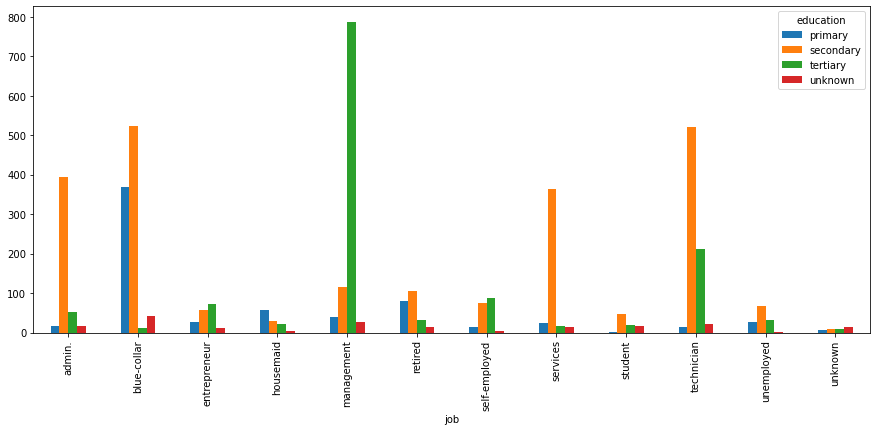

In [5]:
df.groupby(["job","education"]).size().unstack().plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='job'>

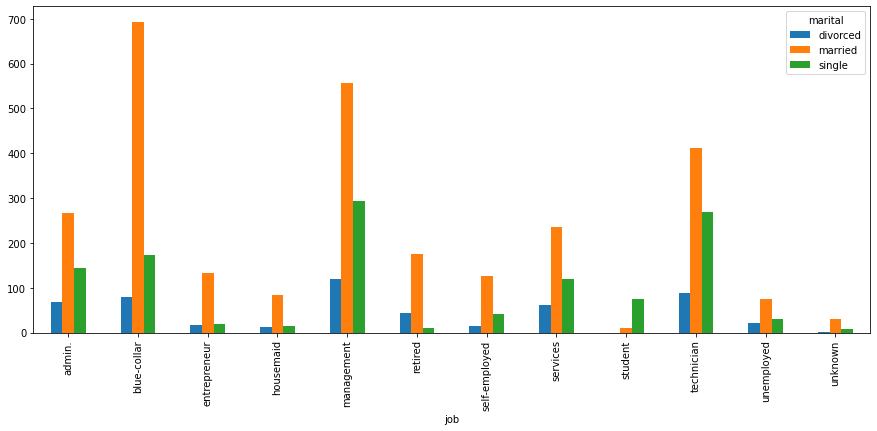

In [6]:
df.groupby(["job","marital"]).size().unstack().plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='job'>

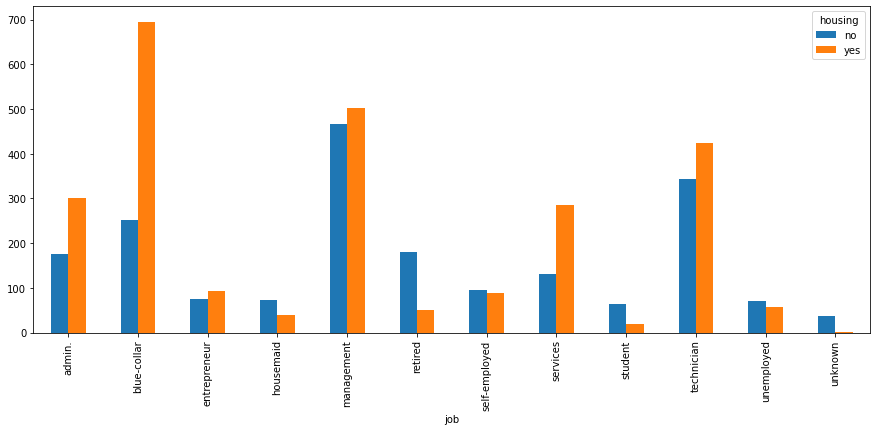

In [7]:
df.groupby(["job","housing"]).size().unstack().plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='job,housing'>

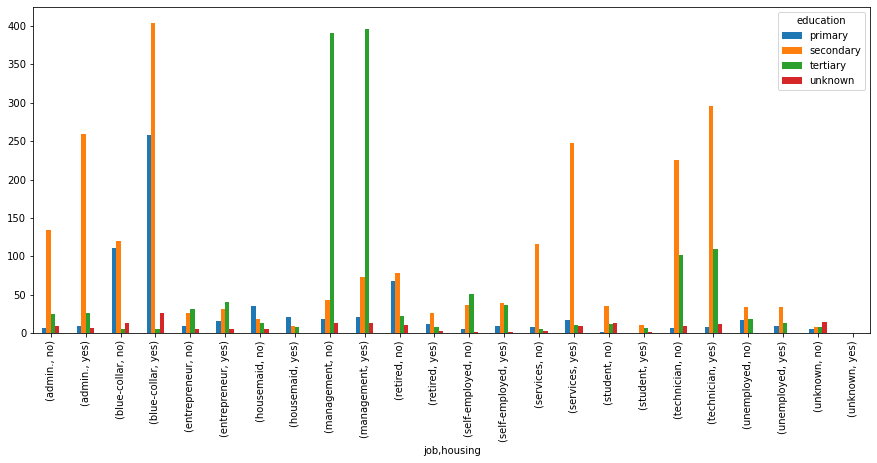

In [8]:
df.groupby(["job","housing","education"]).size().unstack().plot(kind='bar',figsize=(15,6))

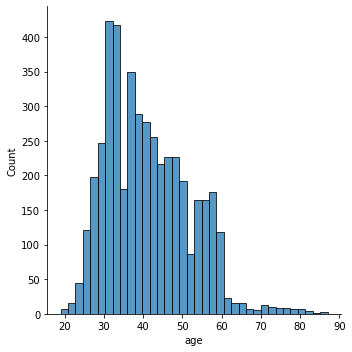

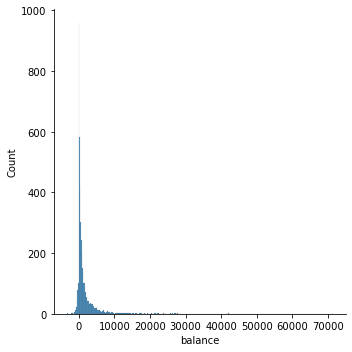

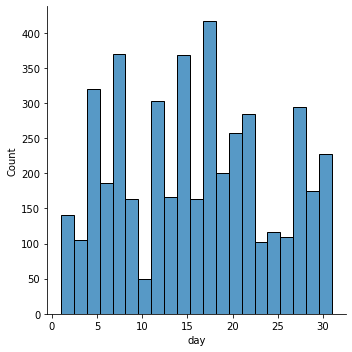

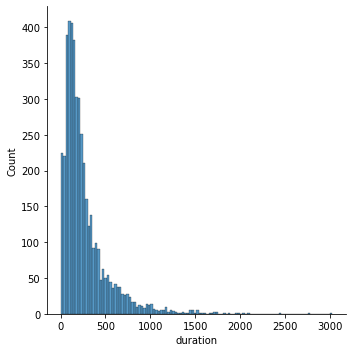

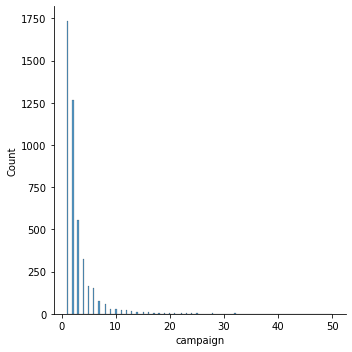

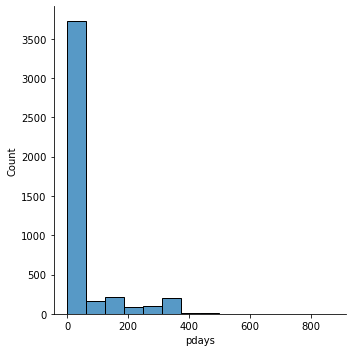

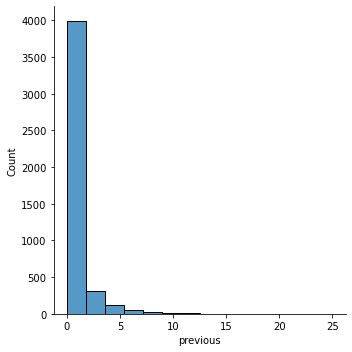

In [9]:
for col in df.select_dtypes(exclude='object'):
    sns.displot(df[col])

### Standardization of data

In [10]:
sc = StandardScaler()
for col in df.select_dtypes(exclude='object'):
    df [[col]]  = sc.fit_transform(df[[col]])

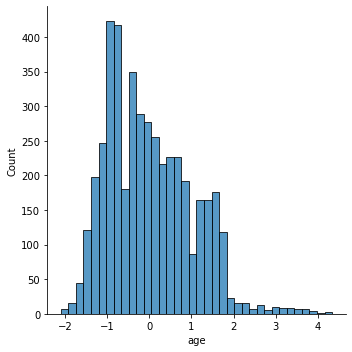

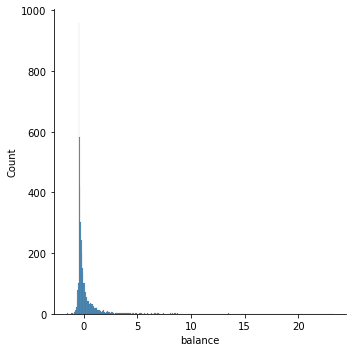

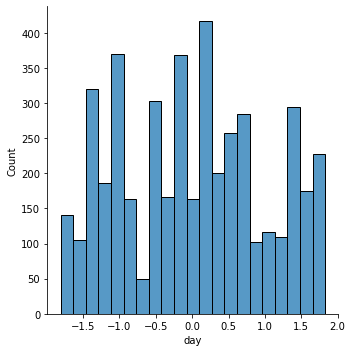

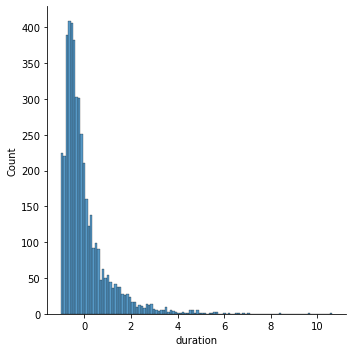

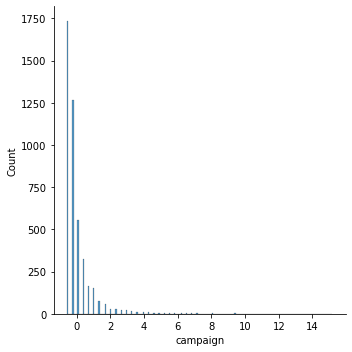

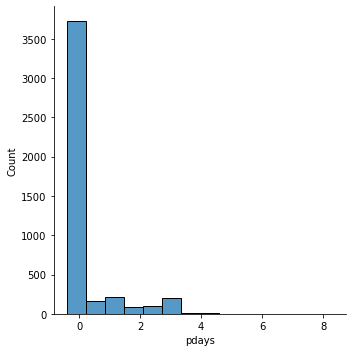

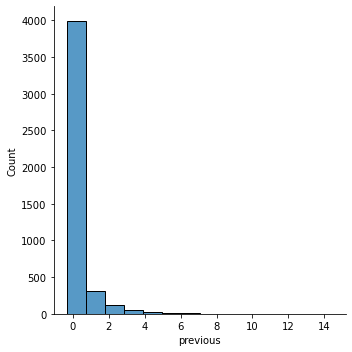

In [11]:
for col in df.select_dtypes(exclude='object'):
    sns.displot(df[col])
    plt.show()

### LabelEncoder

In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

### dividing to Independent and dependent 

In [13]:
x = df.drop('y',axis=1)
y = df['y']

### Splitting data into train and test

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3616, 16), (905, 16), (3616,), (905,))

## Model  Creation

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_score = model.predict_proba(x_test)

### Accuracy Score

In [16]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8707182320441988


### Classification Report

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       790
           1       0.48      0.19      0.27       115

    accuracy                           0.87       905
   macro avg       0.68      0.58      0.60       905
weighted avg       0.84      0.87      0.85       905



### ROC curve

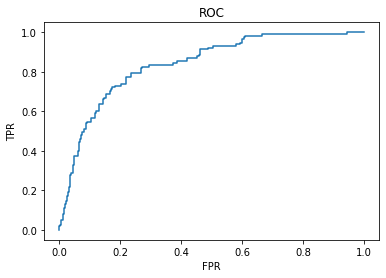

In [18]:
fpr,tpr,th = roc_curve(y_test,y_score[:,1])
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC')
plt.show()

In [19]:
print("Area under the curve is : ",roc_auc_score(y_test,y_score[:,1]))

Area under the curve is :  0.8385360484314806


___________________
______________________